<a href="https://colab.research.google.com/github/AndreyDyachkov/python-dataviz-machine-learning/blob/main/neutron_stars_and_heart_diseases_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

Congratulations on being hired by NASA as a Data Scientist!

**Your first project involves classifying stars based on their astronomical measurements, distinguishing between non-pulsar (0) and pulsar (1)**. Fortunately, astronauts have provided you with a dataset derived from observations across our Galaxy. Your task is to leverage ML techniques such as **SVM, Decision Tree, Random Forest, and K-Neighbours** to determine which model yields the best results.

Given that you're working at NASA, the dataset is exceptionally clean, requiring no preprocessing for missing or categorical values. The dataset is stored in a rar file named "pulsar_stars.csv," which you can find [here](https://www.space.com/32661-pulsars.html).

For additional information on pulsars, refer to:
- [Space.com - Pulsars](https://www.space.com/32661-pulsars.html)
- [Wikipedia - Pulsar](https://en.wikipedia.org/wiki/Pulsar)
- [NASA - Neutron Stars](https://www.nasa.gov/mission_pages/GLAST/science/neutron_stars.html)

You have a binary classification task for two objectives: heart disease and pulsar stars. Specifically, you need to classify between healthy and heart disease (0 and 1) and determine whether a star is a pulsar or not.

Now, for your second variation at IBM Watson:

Congratulations on your position at IBM Watson as a Data Scientist!

Your initial project involves classifying heart disease based on medical measurements, distinguishing between healthy (0) and heart disease (1). Your task is to apply ML techniques such as **SVM, Logistic Regression, Decision Tree, Random Forest, K-Neighbours**, and optionally, **XGBoost or a Neural Network** for a bonus. The goal is to identify the model that performs the best.

As you're working at IBM Watson, you have access to a very clean dataset, requiring no preprocessing for missing or categorical values. The dataset for this task is named "HeartDiseaseDataset.csv," and you can find more details [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

To learn more about the Heart Disease Dataset, visit the provided [link](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

For both projects, you'll be using two datasets and are required to submit a single .ipynb file. Good luck with your analyses!
<br>(text rewrited a bit with ChatGPT just for the sake of interest)

# Classification of neutron stars

### Conclusion

8 models have been used. Support Vector Machine Classifier (SVC) shows the best results:
- Accuracy: 0.97
- F1 Score: 0.86

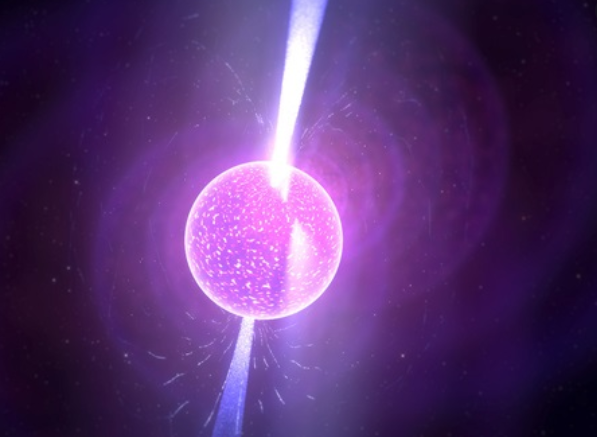

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/pulsarstar.png')

#### Palette

Source: https://coolors.co/

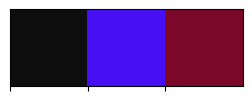

In [ ]:
import seaborn as sns
palette = ['#0F0E0E','#470FF4','#7B0828']
sns.palplot(palette)

### Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import and cleaning data

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/pulsar_stars.csv')
df.head()

Mean_of_the_integrated_profile  \
0                      140.562500   
1                      102.507812   
2                      103.015625   
3                      136.750000   
4                       88.726562   

   Standard_deviation_of_the_integrated_profile  \
0                                     55.683782   
1                                     58.882430   
2                                     39.341649   
3                                     57.178449   
4                                     40.672225   

   Excess_kurtosis_of_the_integrated_profile  \
0                                  -0.234571   
1                                   0.465318   
2                                   0.323328   
3                                  -0.068415   
4                                   0.600866   

   Skewness_of_the_integrated_profile  Mean_of_the_DM_SNR_curve  \
0                           -0.699648                  3.199833   
1                           -0.515088                  1.677258   
2                            1.051164                  3.121237   
3                           -0.636238                  3.642977   
4                            1.123492                  1.178930   

   Standard_deviation_of_the_DM_SNR_curve  \
0                               19.110426   
1                               14.860146   
2                               21.744669   
3                               20.959280   
4                               11.468720   

    Excess_kurtosis_of_the_DM_SNR_curve   Skewness_of_the_DM_SNR_curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

In [ ]:
df.shape

(17898, 9)

Check for duplicates

In [ ]:
df.duplicated().sum()

0

Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean_of_the_integrated_profile                17898 non-null  float64
 1   Standard_deviation_of_the_integrated_profile  17898 non-null  float64
 2   Excess_kurtosis_of_the_integrated_profile     17898 non-null  float64
 3   Skewness_of_the_integrated_profile            17898 non-null  float64
 4   Mean_of_the_DM_SNR_curve                      17898 non-null  float64
 5   Standard_deviation_of_the_DM_SNR_curve        17898 non-null  float64
 6    Excess_kurtosis_of_the_DM_SNR_curve          17898 non-null  float64
 7    Skewness_of_the_DM_SNR_curve                 17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Data types are OK

## Data description

##### What does an integrated pulse profile mean?

The integrated pulse profile in astronomy refers to a graphical representation of the observed intensity of radiation from a celestial object, such as a star, over a complete rotation period. It is commonly used in the study of pulsars.

Pulsars are highly-magnetized, rotating neutron stars that emit beams of electromagnetic radiation from their magnetic poles. As the pulsar rotates, these beams of radiation are observed on Earth, leading to periodic variations in the observed intensity. The integrated pulse profile is created by summing up the observed intensity at each rotational phase over many rotations, resulting in an average profile.

The profile typically shows peaks and troughs, representing the moments when the observer detects more or less radiation. The shape and characteristics of the integrated pulse profile can provide valuable information about the pulsar, such as its rotational period, magnetic field strength, and the geometry of the emission beams.

Astronomers use sophisticated instruments, such as radio telescopes, to detect and record the pulsar signals. Analyzing the integrated pulse profile helps researchers understand the properties and behavior of pulsars, contributing to our broader understanding of stellar astrophysics and the extreme conditions in which pulsars exist.

##### What is DM SNR?

In astronomy, DM SNR refers to "Dispersion Measure Signal-to-Noise Ratio." Let's break down the components:

1. **Dispersion Measure (DM):** Dispersion measure is a quantity used in radio astronomy to characterize the amount of dispersion that interstellar or intergalactic electrons impose on electromagnetic radiation as it travels through space. As electromagnetic waves pass through a medium with free electrons, lower frequencies travel more slowly than higher frequencies, causing a dispersion of the signal.

   The dispersion measure is expressed in units of parsecs per cubic centimeter (pc/cm³) and is calculated based on the observed time delay between pulses at different frequencies. It is particularly relevant in the study of pulsars, where the dispersion of the pulsar signal can be used to estimate the number of electrons along the line of sight.

2. **Signal-to-Noise Ratio (SNR):** SNR is a measure of the strength of a signal relative to the background noise. In astronomy, it indicates how well a signal can be distinguished from random noise in the data. A higher SNR generally implies a more reliable and significant detection.

   SNR is calculated by dividing the amplitude or strength of the signal by the standard deviation of the background noise.

Now, putting them together:

3. **DM SNR (Dispersion Measure Signal-to-Noise Ratio):** In the context of radio astronomy and pulsar studies, DM SNR is a metric that assesses the quality of a pulsar signal by considering both the dispersion measure and the signal-to-noise ratio. **A higher DM SNR suggests a more clearly detected and characterized pulsar signal,** making it easier for astronomers to study and analyze the properties of the pulsar.

In summary, DM SNR is a measure used in radio astronomy to evaluate the strength of pulsar signals, taking into account the dispersion measure caused by the interstellar medium and the signal-to-noise ratio. It plays a crucial role in the analysis of pulsar observations and contributes to our understanding of astrophysical phenomena.

##### Change column names: assign shorter names

In [ ]:
df.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       ' Excess_kurtosis_of_the_DM_SNR_curve', ' Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

In [ ]:
df.columns = ['mean_ip', 'sd_ip', 'excess_kurtosis_ip', 'skewness_ip',
              'mean_dm_snr', 'sd_dm_snr', 'excess_kurtosis_dm_snr', 'skewness_dm_snr', 'target_class']
df.head()

mean_ip      sd_ip  excess_kurtosis_ip  skewness_ip  mean_dm_snr  \
0  140.562500  55.683782           -0.234571    -0.699648     3.199833   
1  102.507812  58.882430            0.465318    -0.515088     1.677258   
2  103.015625  39.341649            0.323328     1.051164     3.121237   
3  136.750000  57.178449           -0.068415    -0.636238     3.642977   
4   88.726562  40.672225            0.600866     1.123492     1.178930   

   sd_dm_snr  excess_kurtosis_dm_snr  skewness_dm_snr  target_class  
0  19.110426                7.975532        74.242225             0  
1  14.860146               10.576487       127.393580             0  
2  21.744669                7.735822        63.171909             0  
3  20.959280                6.896499        53.593661             0  
4  11.468720               14.269573       252.567306             0

## EDA

In [ ]:
df.describe().round(2)

mean_ip     sd_ip  excess_kurtosis_ip  skewness_ip  mean_dm_snr  \
count  17898.00  17898.00            17898.00     17898.00     17898.00   
mean     111.08     46.55                0.48         1.77        12.61   
std       25.65      6.84                1.06         6.17        29.47   
min        5.81     24.77               -1.88        -1.79         0.21   
25%      100.93     42.38                0.03        -0.19         1.92   
50%      115.08     46.95                0.22         0.20         2.80   
75%      127.09     51.02                0.47         0.93         5.46   
max      192.62     98.78                8.07        68.10       223.39   

       sd_dm_snr  excess_kurtosis_dm_snr  skewness_dm_snr  target_class  
count   17898.00                17898.00         17898.00      17898.00  
mean       26.33                    8.30           104.86          0.09  
std        19.47                    4.51           106.51          0.29  
min         7.37                   -3.14            -1.98          0.00  
25%        14.44                    5.78            34.96          0.00  
50%        18.46                    8.43            83.06          0.00  
75%        28.43                   10.70           139.31          0.00  
max       110.64                   34.54          1191.00          1.00

Scatter plot matrix

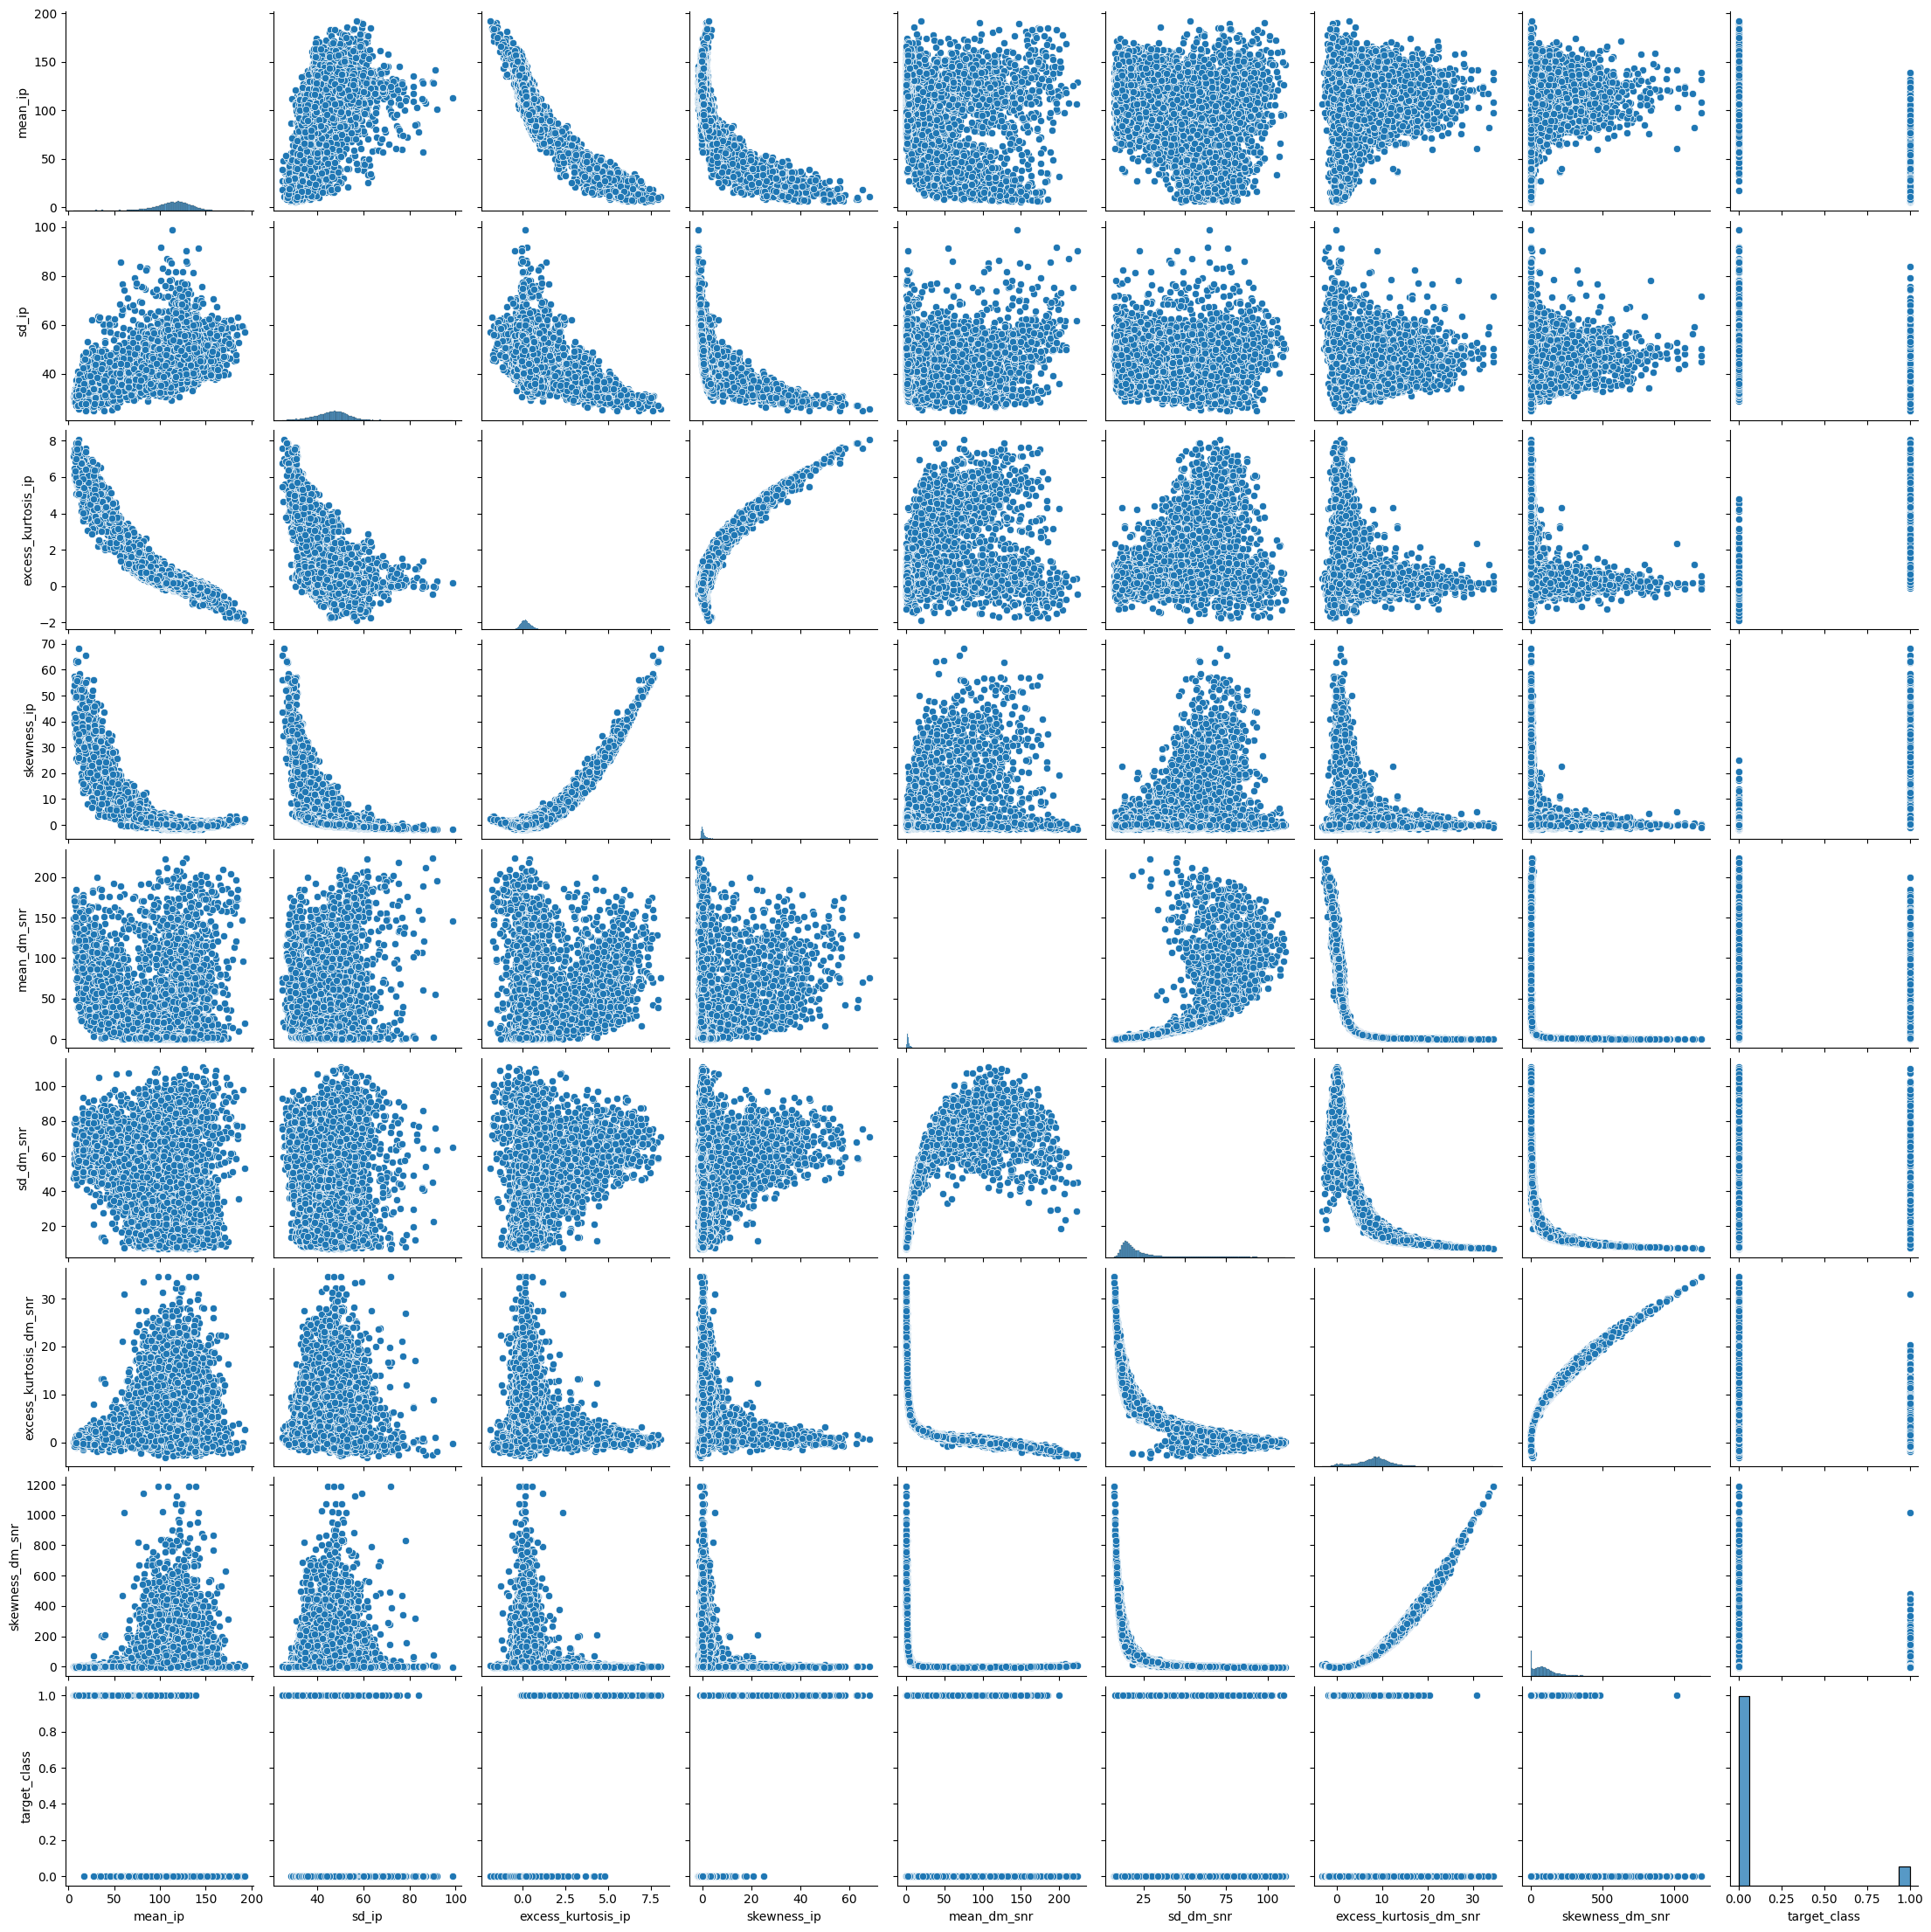

In [ ]:
sns.pairplot(df)
plt.show()

Some features have strong non-linear relations with some other features, which is expected, as they are different moments of the same distribution.

Correlation

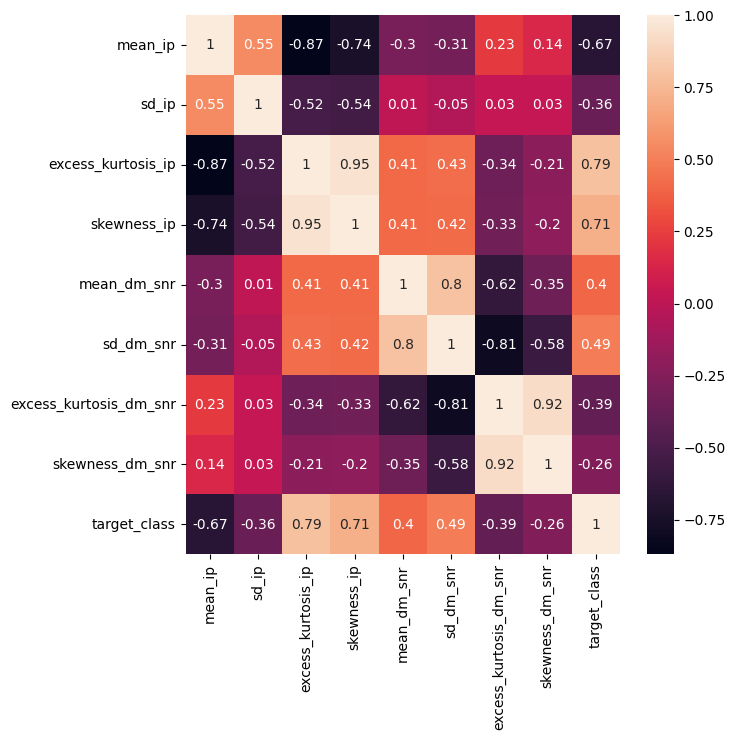

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(numeric_only=True).round(2),  annot=True)
plt.show()

Some features are strongly correlated with each other, as they are the moments of the same distribution. Collinearity affects classification models, however, let's leave it as it is for now.

Outliers

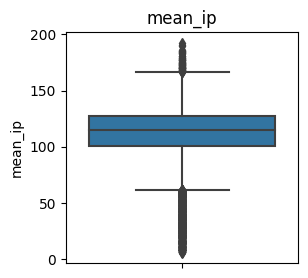

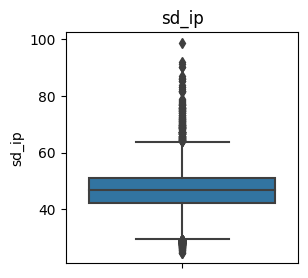

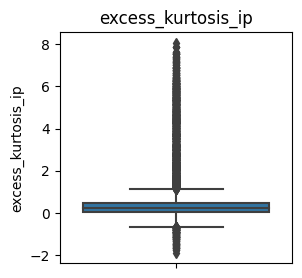

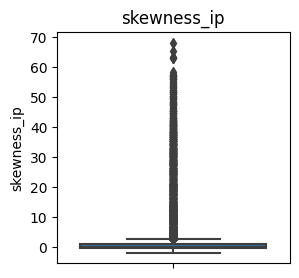

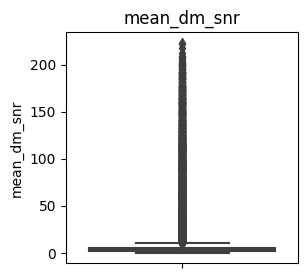

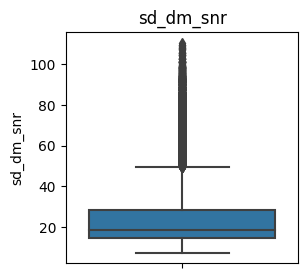

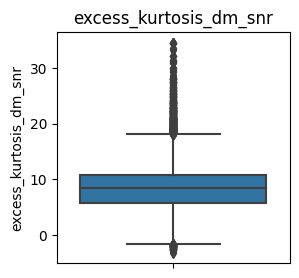

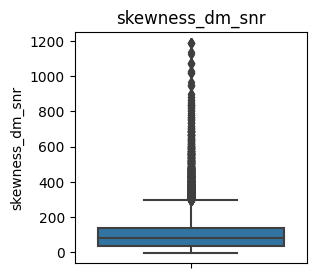

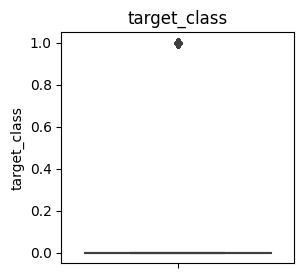

In [ ]:
for name in df.columns:
    plt.figure(figsize=(3, 3))
    plt.title(name)
    sns.boxplot(y=name, data=df)
    plt.show()

A lot of outliers - let's leave them for now (many classification algorithmes are robust to outliers; outliers might carry valuable information)

Label variable

In [ ]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [ ]:
df['target_class'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    90.8%
1     9.2%
Name: target_class, dtype: object

The dataset is severely imbalanced. We will deal with this problem later.

Histograms of feature distribution for 0 and 1 classes

In [ ]:
for col_name in df.columns:
  fig = px.histogram(df,
                   x=col_name,
                   nbins = 30,
                   color = "target_class",
                   color_discrete_sequence= [palette[0],palette[1]],
                   barmode="overlay",
                   marginal = 'box',
                   title = col_name)
  fig.show()


All features seem to differ significantly in the two classes. That is good for a  classification task

Another visualization of the two classes

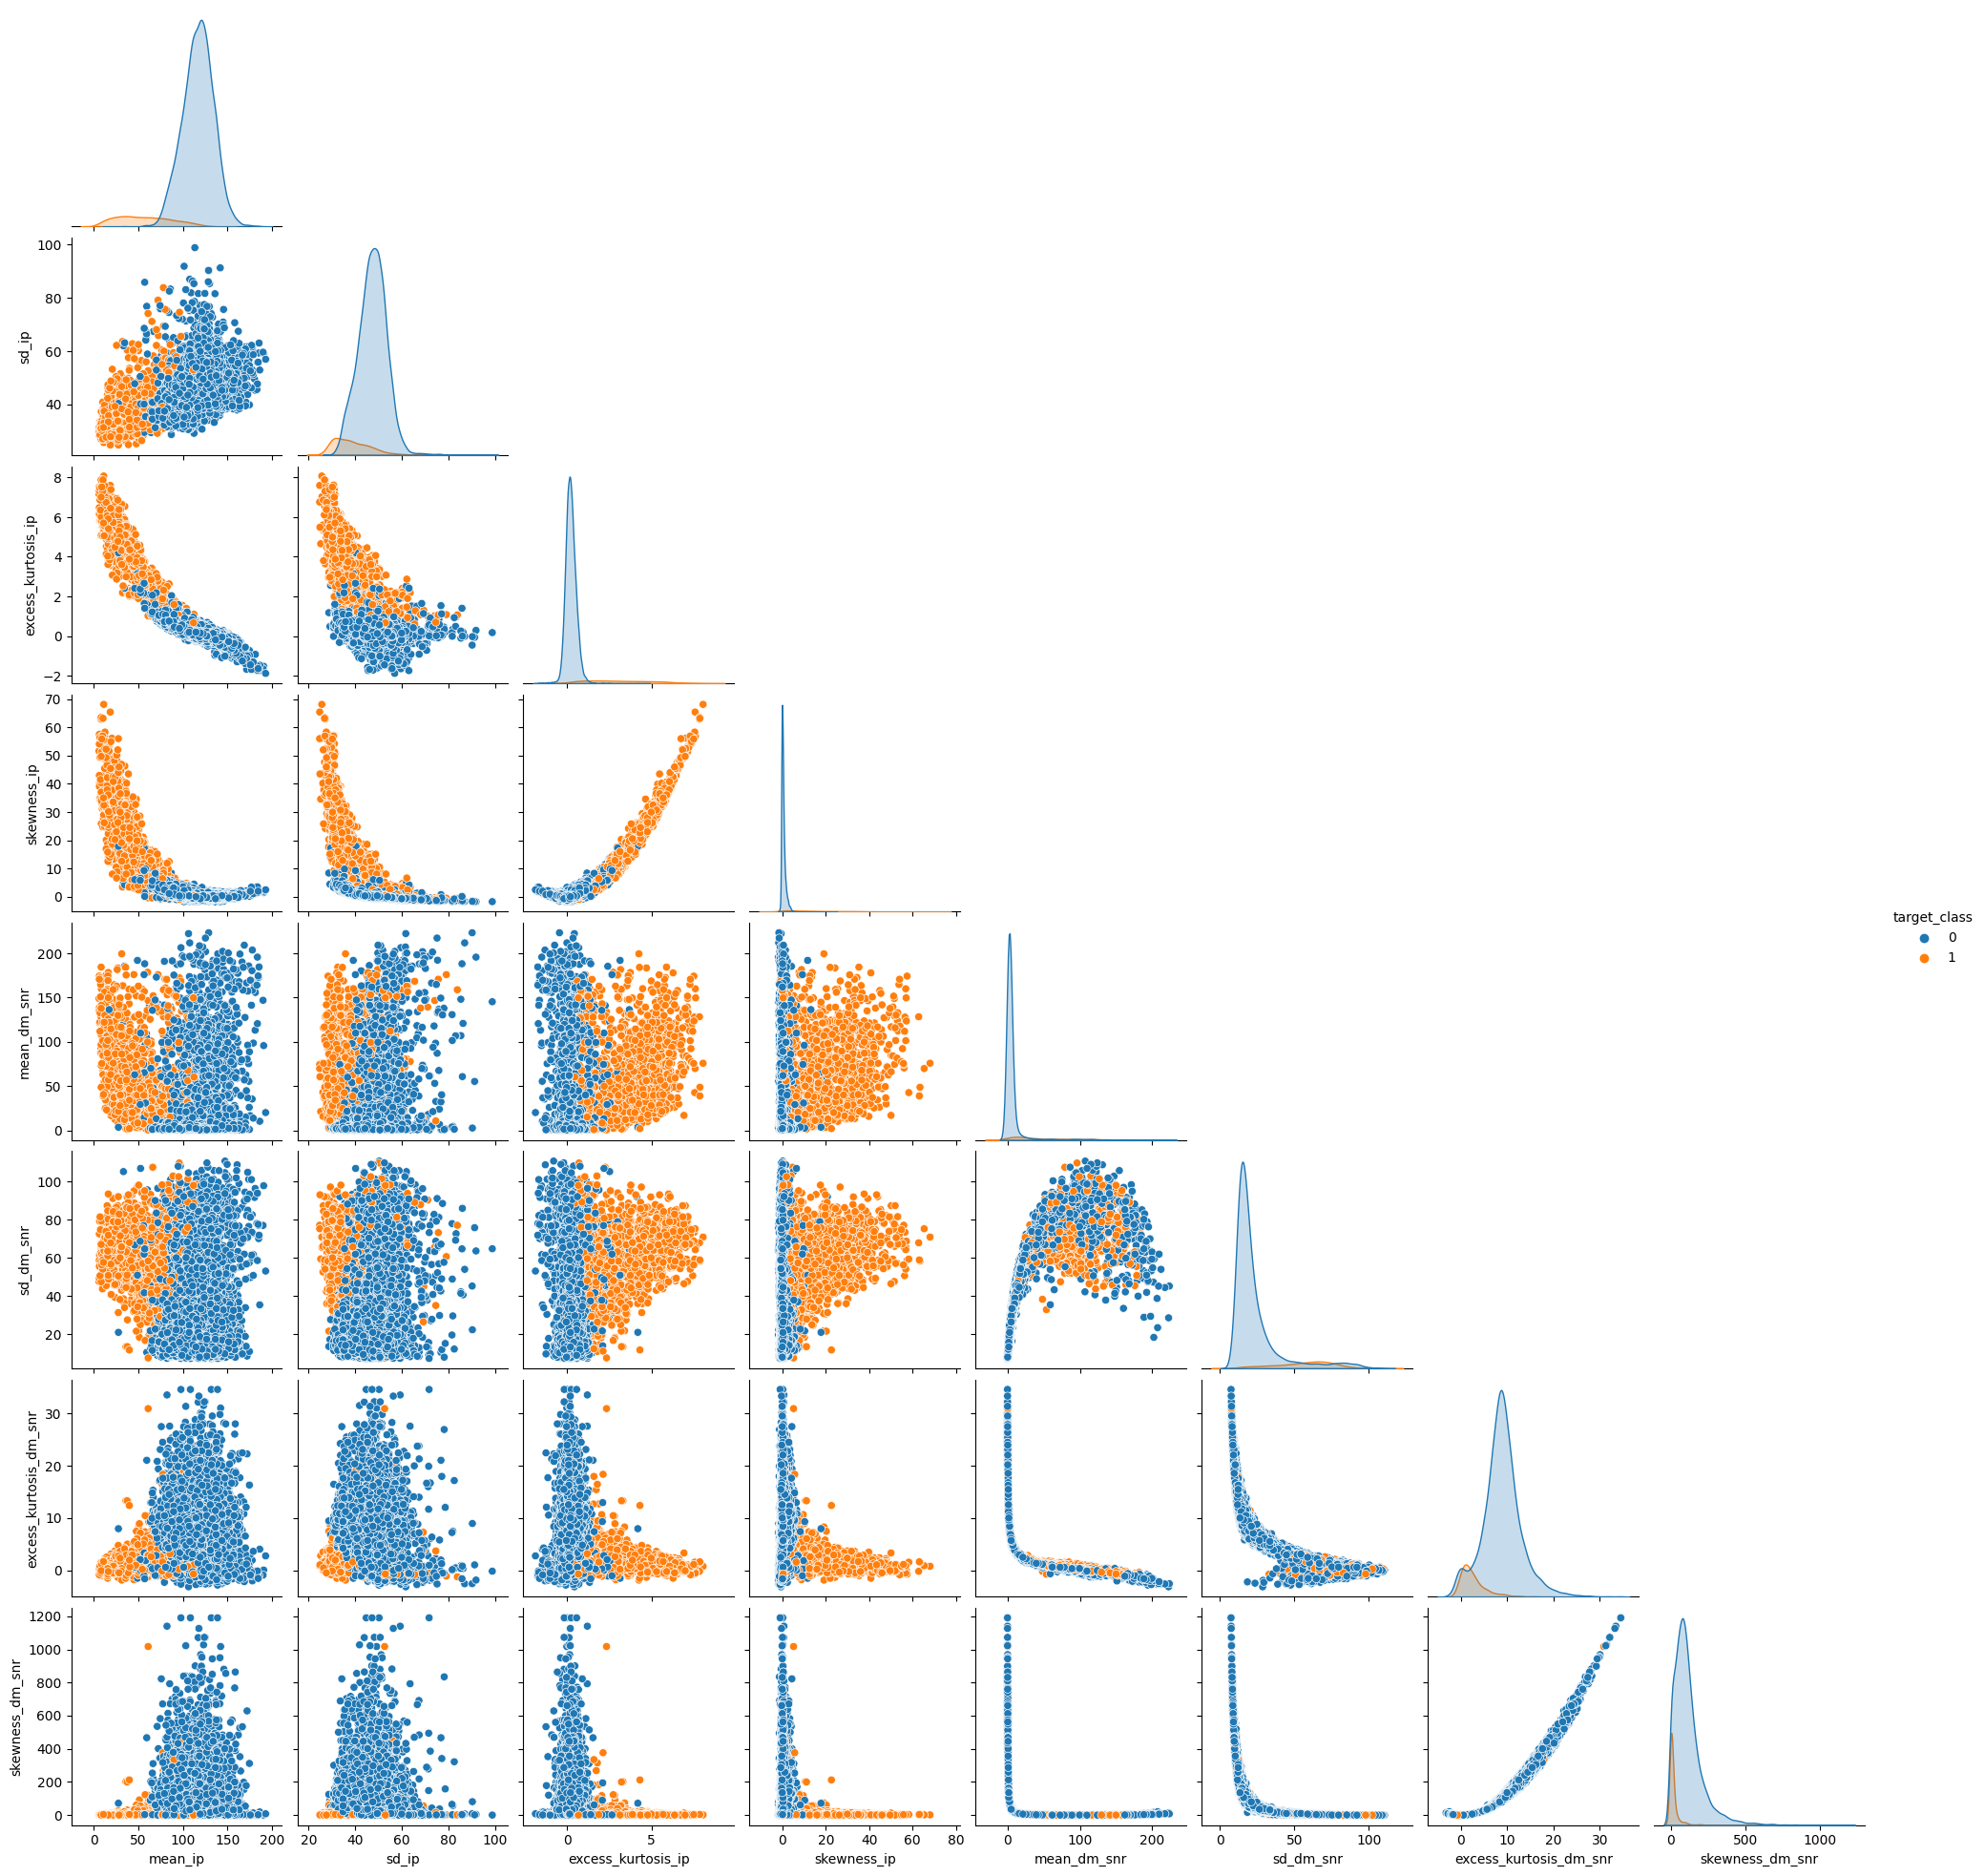

In [ ]:
sns.pairplot(data = df,hue = 'target_class',corner = True)
plt.show()

## Train-test splitting

In [ ]:
X = df.drop('target_class', axis=1)
y = df['target_class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True,random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14318, 8) (14318,)
(3580, 8) (3580,)


## Scaling

##### Theory

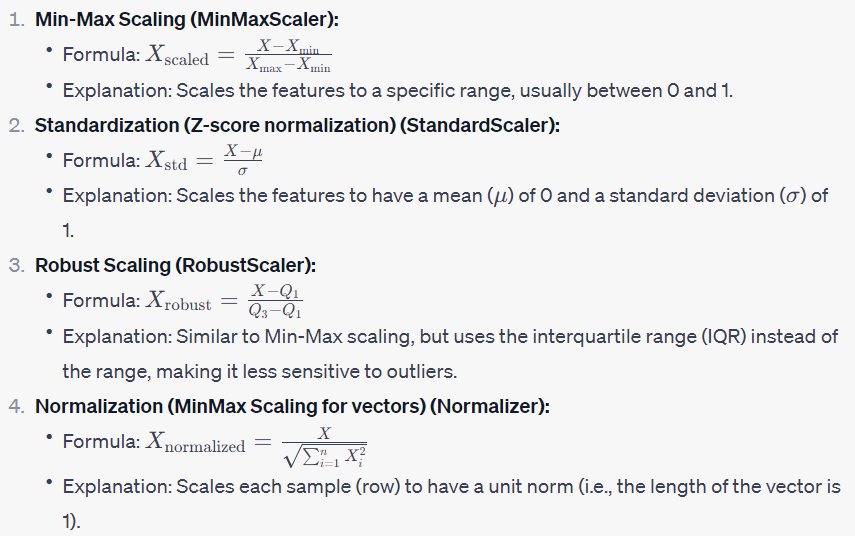

Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.
When normalizing the test set, one should apply the normalization parameters previously obtained from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would produce wrong predictions.

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

0         1         2         3         4         5         6  \
count  14318.00  14318.00  14318.00  14318.00  14318.00  14318.00  14318.00   
mean       0.56      0.29      0.24      0.05      0.06      0.18      0.30   
std        0.14      0.09      0.11      0.09      0.13      0.19      0.12   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.51      0.24      0.19      0.02      0.01      0.07      0.24   
50%        0.59      0.30      0.21      0.03      0.01      0.11      0.31   
75%        0.65      0.35      0.24      0.04      0.02      0.20      0.37   
max        1.00      1.00      1.00      1.00      1.00      1.00      1.00   

              7  
count  14318.00  
mean       0.09  
std        0.09  
min        0.00  
25%        0.03  
50%        0.07  
75%        0.12  
max        1.00

## SMOT

As the dataset is imbalanced we need to apply some techniques to address it. One of them is oversampling: Increase the number of instances in the minority class by duplicating or creating synthetic examples. One popular oversampling technique is the Synthetic Minority Over-sampling Technique (SMOTE). It generates synthetic samples for the minority class to balance the class distribution.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(26000, 8)
(26000,)


Before oversampling:

In [ ]:
y_train.value_counts()

0    13000
1     1318
Name: target_class, dtype: int64

After oversampling:

In [ ]:
y_train_resampled.value_counts()

0    13000
1    13000
Name: target_class, dtype: int64

## Classification

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

### Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

##### Theory

Metrics:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- Accuracy = (TP + TN) / (TP + FP + TN + FN)
- F1-score = 2 * ((Precision* Recall) / (Precision + Recall))

1. **Precision:**
   - Precision is the ratio of true positives to the sum of true positives and false positives. It measures the accuracy of the positive predictions.
2. **Recall (Sensitivity):**
   - Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the ability of the classifier to capture all the positive instances.
3. **F1-Score:**
   - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of precision and recall.
4. **Support:**
   - Support is the number of actual occurrences of the class in the specified dataset. It represents the number of instances for each class.
5. **Accuracy:**
   - Overall accuracy is usually provided at the bottom of the report. It represents the ratio of correctly predicted instances to the total number of instances.

```plaintext
             precision    recall  f1-score   support

    Class 0       0.80      0.85      0.82        50
    Class 1       0.75      0.68      0.71        30
    Class 2       0.90      0.92      0.91        70

    accuracy                           0.83       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.83      0.83       150
```

In this example, the classification report provides precision, recall, and F1-score for each class (Class 0, Class 1, Class 2) along with the support for each class. The macro and weighted averages are also provided, offering an overall assessment of the model's performance.

In a multi-class classification scenario with three classes (Class 0, Class 1, Class 2), the recall for each class is given by the following formula. These formulas provide the recall for each individual class, giving insight into how well the classifier is performing in terms of capturing positive instances for each class.

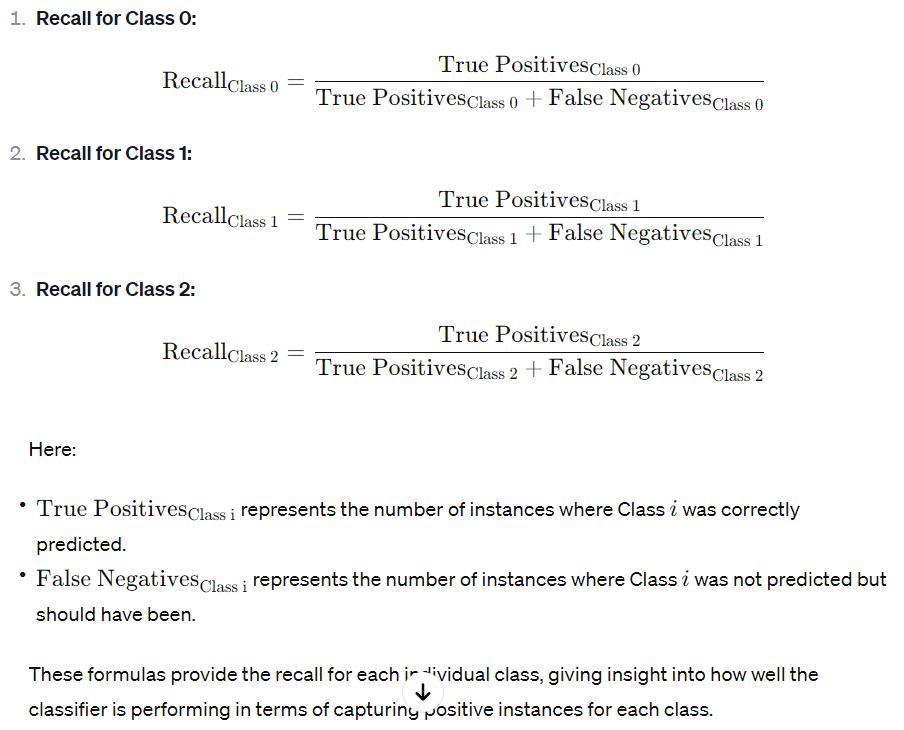

https://en.wikipedia.org/wiki/Confusion_matrix

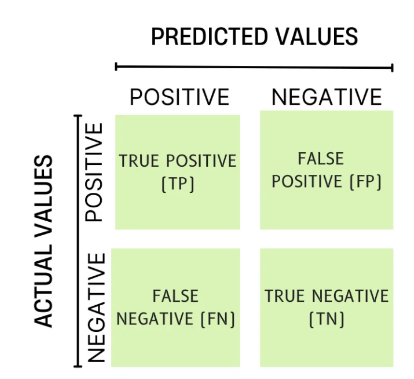

**sklearn.metrics.confusion_matrix**
- cm = confusion_matrix(y, y_pred)
- {'tn': cm[0, 0], 'fp': cm[0, 1],
- 'fn': cm[1, 0], 'tp': cm[1, 1]}

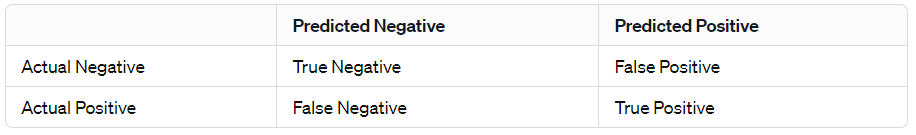

More than 2 classes

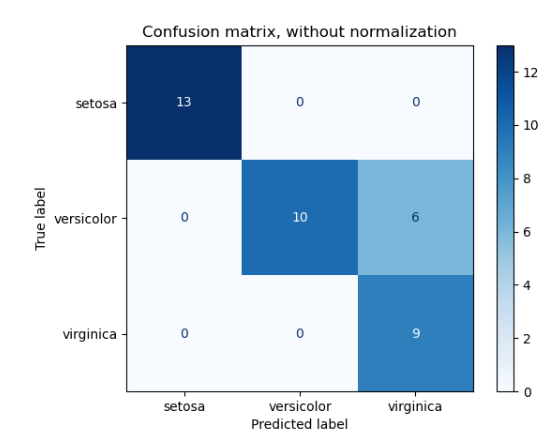

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

AUC-ROC stands for "Area Under the Receiver Operating Characteristic curve." It is a performance metric used for binary classification problems, particularly in machine learning and statistics. The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various thresholds.

Here's a breakdown of the key components:

1. **Receiver Operating Characteristic (ROC) Curve:**
   - The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values. Each point on the curve represents a different threshold setting.

2. **Area Under the Curve (AUC):**
   - AUC-ROC quantifies the overall performance of a classification model across various thresholds. The AUC is the area under the ROC curve. It ranges from 0 to 1, where a higher AUC indicates better discrimination ability of the model.
   - A model with an AUC of 0.5 has no discriminatory power (similar to random guessing), while a model with an AUC of 1.0 has perfect discriminatory power.

3. **Interpretation of AUC-ROC:**
   - AUC-ROC is often interpreted as the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. In other words, it measures the model's ability to distinguish between the positive and negative classes.

4. **Perfect Model and Random Model:**
   - A perfect model would have an AUC-ROC of 1.0, indicating that it achieves a true positive rate of 1 and a false positive rate of 0 across all possible thresholds.
   - A random model would have an AUC-ROC of 0.5, indicating that its performance is no better than random chance.

##### Metrics

In [ ]:
def evaluate(true, predicted):
  # Evaluate the model
  accuracy = accuracy_score(true, predicted)
  precision = precision_score(true, predicted)
  recall = recall_score(true, predicted)
  f1 = f1_score(true, predicted)
  conf_matrix = confusion_matrix(true, predicted)
  classification_rep = classification_report(true, predicted)

  # Print the evaluation metrics
  print("Accuracy:", accuracy.round(2))
  print("Precision:", precision.round(2))
  print("Recall:", recall.round(2))
  print("F1 Score:", f1.round(2))
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", classification_rep)

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.97
Precision: 0.78
Recall: 0.91
F1 Score: 0.84

Confusion Matrix:
 [[3176   83]
 [  28  293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3259
           1       0.78      0.91      0.84       321

    accuracy                           0.97      3580
   macro avg       0.89      0.94      0.91      3580
weighted avg       0.97      0.97      0.97      3580



##### Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

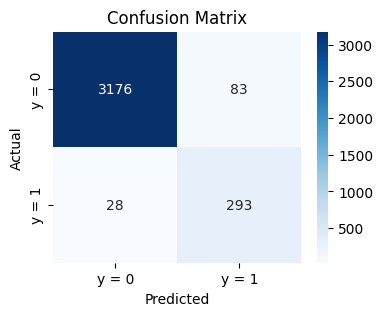

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['y = 0','y = 1'], yticklabels=['y = 0','y = 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

In [ ]:
# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

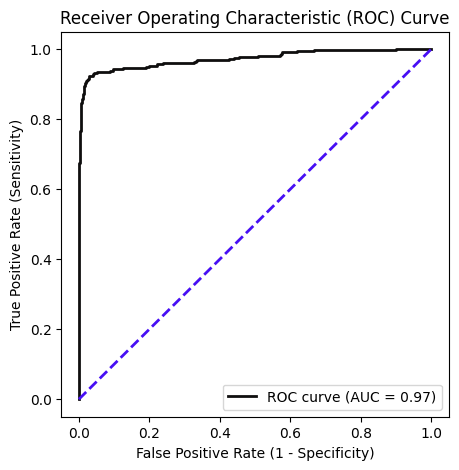

In [ ]:
# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color=palette[0], lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc_score))
plt.plot([0, 1], [0, 1], color=palette[1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.95
Precision: 0.66
Recall: 0.91
F1 Score: 0.76

Confusion Matrix:
 [[3108  151]
 [  29  292]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3259
           1       0.66      0.91      0.76       321

    accuracy                           0.95      3580
   macro avg       0.82      0.93      0.87      3580
weighted avg       0.96      0.95      0.95      3580



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.98
Precision: 0.86
Recall: 0.91
F1 Score: 0.88

Confusion Matrix:
 [[3211   48]
 [  29  292]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.86      0.91      0.88       321

    accuracy                           0.98      3580
   macro avg       0.92      0.95      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Create and train the AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.96
Precision: 0.73
Recall: 0.92
F1 Score: 0.81

Confusion Matrix:
 [[3149  110]
 [  27  294]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3259
           1       0.73      0.92      0.81       321

    accuracy                           0.96      3580
   macro avg       0.86      0.94      0.89      3580
weighted avg       0.97      0.96      0.96      3580



### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create and train the Naive Bayes model (Gaussian Naive Bayes)
model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.94
Precision: 0.61
Recall: 0.87
F1 Score: 0.72

Confusion Matrix:
 [[3083  176]
 [  43  278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3259
           1       0.61      0.87      0.72       321

    accuracy                           0.94      3580
   macro avg       0.80      0.91      0.84      3580
weighted avg       0.95      0.94      0.94      3580



### Gradient Boosting Models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.97
Precision: 0.76
Recall: 0.92
F1 Score: 0.84

Confusion Matrix:
 [[3168   91]
 [  25  296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3259
           1       0.76      0.92      0.84       321

    accuracy                           0.97      3580
   macro avg       0.88      0.95      0.91      3580
weighted avg       0.97      0.97      0.97      3580



### Support Vector Machine Classifier (SVC)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create and train the SVM model
model = SVC(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.97
Precision: 0.81
Recall: 0.93
F1 Score: 0.86

Confusion Matrix:
 [[3190   69]
 [  24  297]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3259
           1       0.81      0.93      0.86       321

    accuracy                           0.97      3580
   macro avg       0.90      0.95      0.93      3580
weighted avg       0.98      0.97      0.97      3580



### K-Neighbors Classifier (KNN)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create and train the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.95
Precision: 0.64
Recall: 0.93
F1 Score: 0.76

Confusion Matrix:
 [[3091  168]
 [  23  298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3259
           1       0.64      0.93      0.76       321

    accuracy                           0.95      3580
   macro avg       0.82      0.94      0.86      3580
weighted avg       0.96      0.95      0.95      3580



# Classification of heart diseases

### Conclusion

10 models have been used (incl. simple neural network). K-Neighbors Classifier (KNN) shows the best results:
- Accuracy: 0.85
- F1 Score: 0.87

<br>It seems that there is not enought data for a Neural network.

https://archive.ics.uci.edu/dataset/45/heart+disease

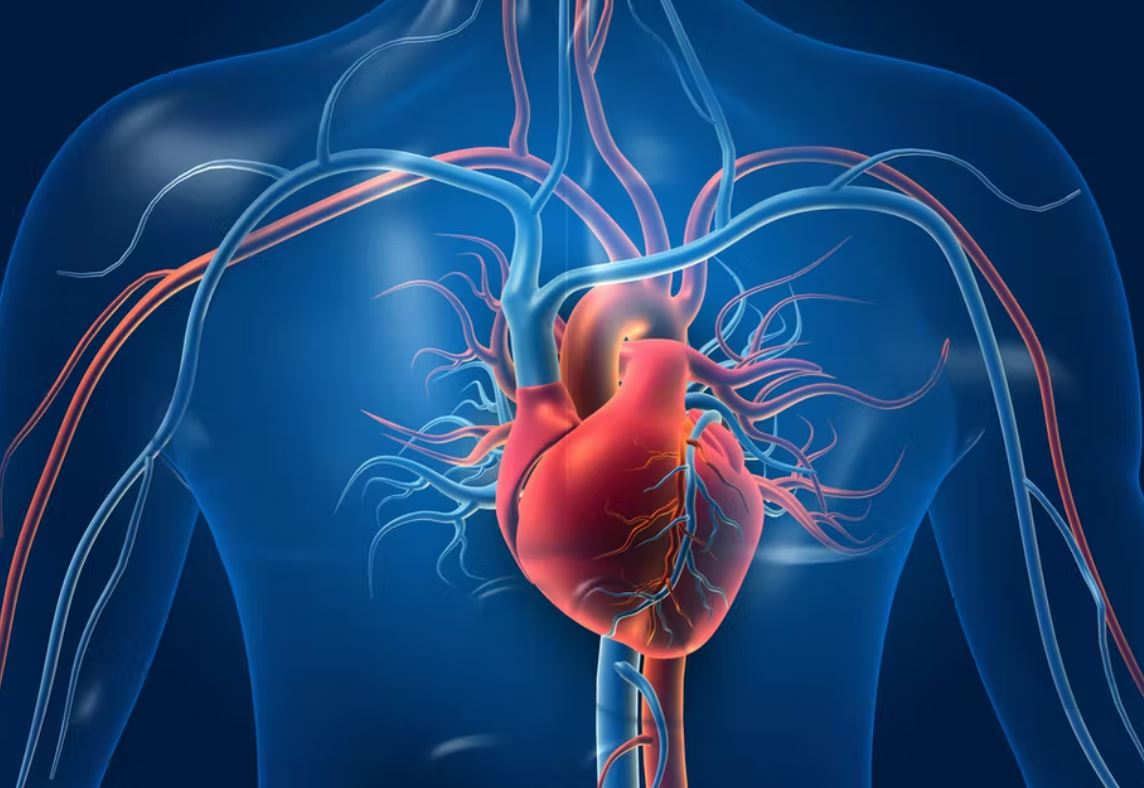

In [ ]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/heart.JPG')

## Import and cleaning data

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/HeartDiseaseDataset.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
df.shape

(303, 14)

Check for duplicates

In [ ]:
df.duplicated().sum()

1

Let's leave this row

Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data types are OK

## Data description

The data is derived from the clinical and noninvasive test results of 303 patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio.
- **age**: age in years
- **sex**: sex (1 = male; 0 = female)
- **cp**: chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: serum cholestoral in mg/dl
- **fbs**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: maximum heart rate achieved
- **exang**: exercise induced angina (1 = yes; 0 = no)
- **oldpeak** = ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping
- **ca**: number of major vessels (0-3) colored by flourosopy
- **thal(what is it?)**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **num**: diagnosis of heart disease (angiographic disease status)
        - Value 0: < 50% diameter narrowing
        - Value 1: > 50% diameter narrowing
        (in any major vessel)  

Most data are categorical

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
numeric_col = ['age','trestbps','chol','thalach','oldpeak','ca']
cat_col = ['sex','cp','fbs','restecg','exang','slope','thal']

## EDA

In [ ]:
df.describe().round(2)

age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  303.00  303.00  303.00    303.00  303.00  303.00   303.00   303.00   
mean    54.37    0.68    0.97    131.62  246.26    0.15     0.53   149.65   
std      9.08    0.47    1.03     17.54   51.83    0.36     0.53    22.91   
min     29.00    0.00    0.00     94.00  126.00    0.00     0.00    71.00   
25%     47.50    0.00    0.00    120.00  211.00    0.00     0.00   133.50   
50%     55.00    1.00    1.00    130.00  240.00    0.00     1.00   153.00   
75%     61.00    1.00    2.00    140.00  274.50    0.00     1.00   166.00   
max     77.00    1.00    3.00    200.00  564.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  target  
count  303.00   303.00  303.00  303.00  303.00  303.00  
mean     0.33     1.04    1.40    0.73    2.31    0.54  
std      0.47     1.16    0.62    1.02    0.61    0.50  
min      0.00     0.00    0.00    0.00    0.00    0.00  
25%      0.00     0.00    1.00    0.00    2.00    0.00  
50%      0.00     0.80    1.00    0.00    2.00    1.00  
75%      1.00     1.60    2.00    1.00    3.00    1.00  
max      1.00     6.20    2.00    4.00    3.00    1.00

Scatter plot matrix (numerical columns only)

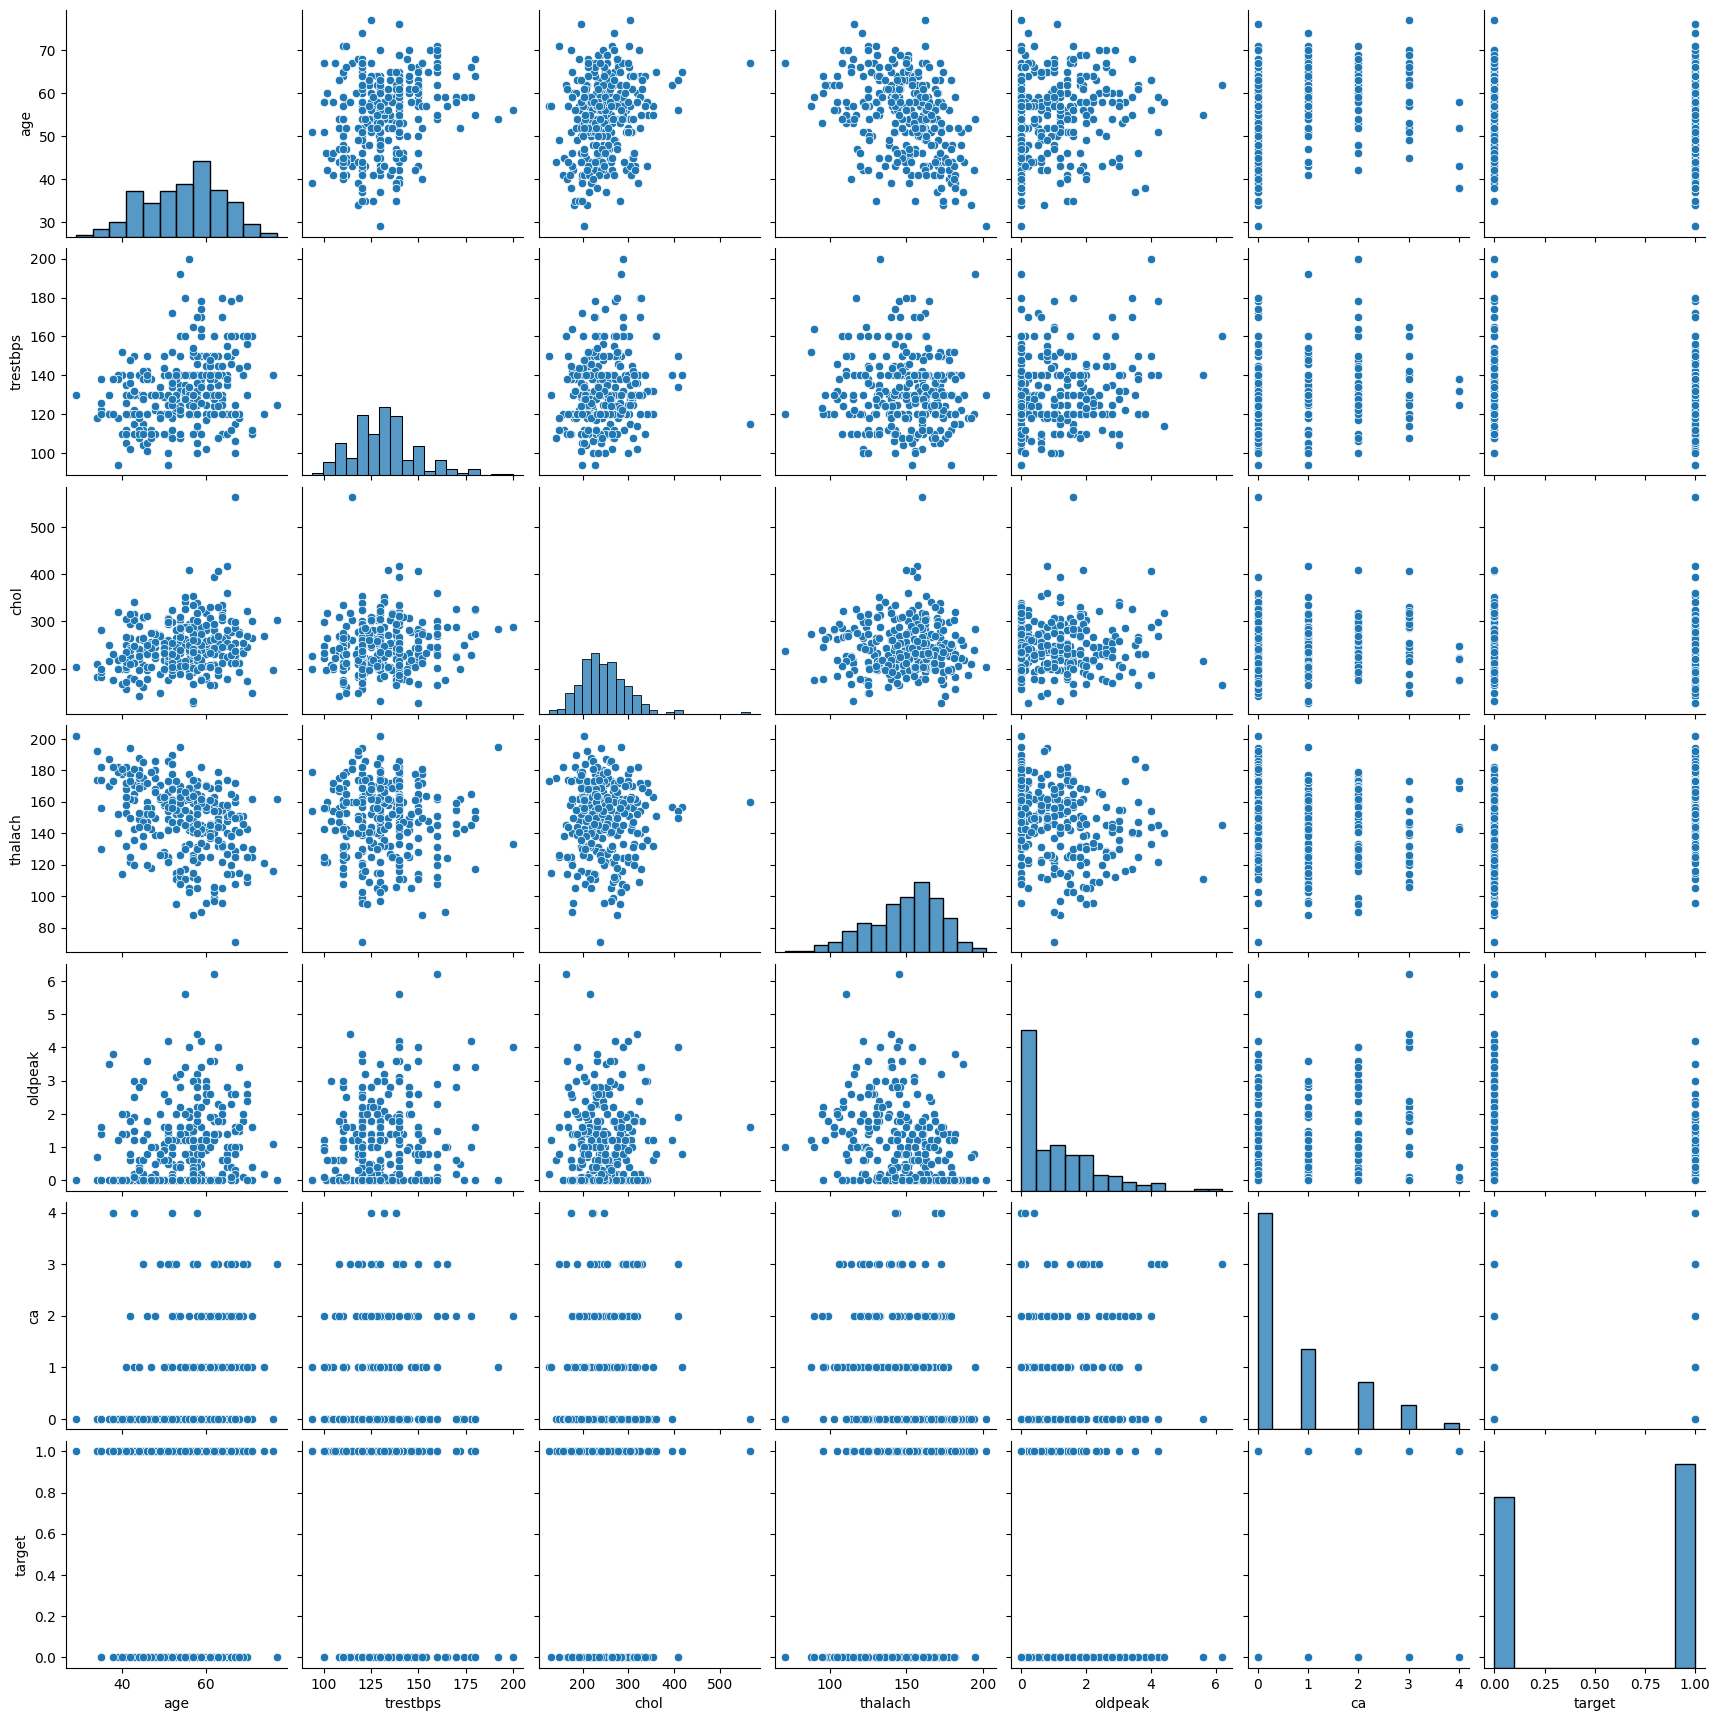

In [ ]:
sns.pairplot(df.drop(cat_col, axis=1))
plt.show()

Correlation of numerical features

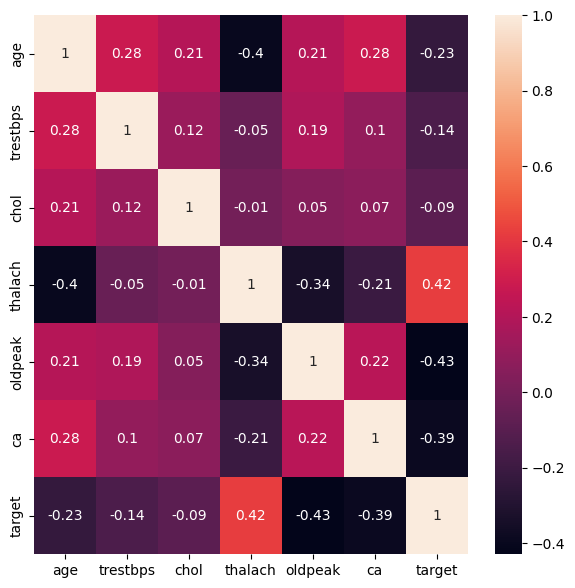

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.drop(cat_col, axis=1).corr(numeric_only=True).round(2),  annot=True)
plt.show()

Outliers in numerical data

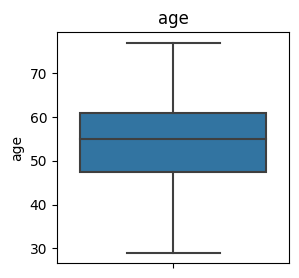

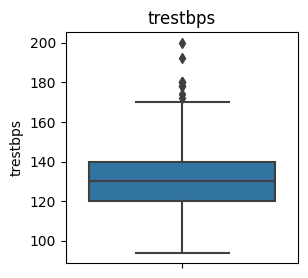

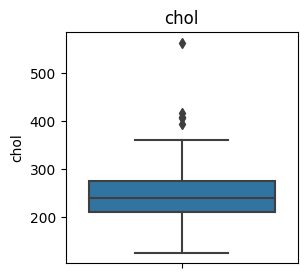

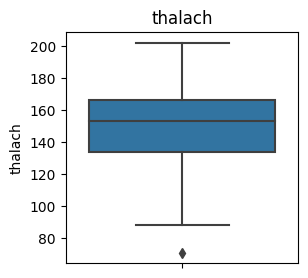

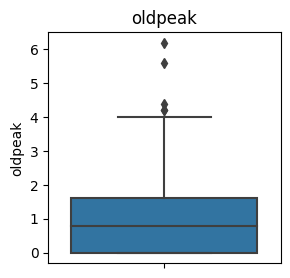

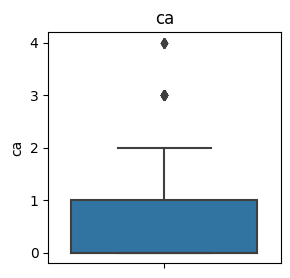

In [ ]:
for name in numeric_col:
    plt.figure(figsize=(3, 3))
    plt.title(name)
    sns.boxplot(y=name, data=df)
    plt.show()

There are some extreme values, such as cholesterol level over 500 mg/dl or blood pressure over 200 mm Hg. However, all those values could be real, so let's leave them.

The feature "ca", the number of major heart vessels, can't be more than 3, as there are only 3 major coronary arteries in the heart: the right coronary artery and two branches of the left coronary artery: the circumflex artery and the left anterior descending artery. However, let's leave this as it is for now.

Label variable

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df['target'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    54.5%
0    45.5%
Name: target, dtype: object

The dataset is balanced

## Train-test splitting

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, shuffle=True,random_state=42) # test size is set to 35%, as there is a lack of test data for the neural network

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(196, 13) (196,)
(107, 13) (107,)


## Scaling

### Standard scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

0       1       2       3       4       5       6       7       8   \
count  196.00  196.00  196.00  196.00  196.00  196.00  196.00  196.00  196.00   
mean    -0.00    0.00   -0.00    0.00   -0.00   -0.00    0.00   -0.00   -0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -2.28   -1.40   -0.97   -2.19   -2.12   -0.39   -0.99   -2.69   -0.72   
25%     -0.74   -1.40   -0.97   -0.66   -0.67   -0.39   -0.99   -0.76   -0.72   
50%      0.14    0.71   -0.01   -0.07   -0.09   -0.39    0.93    0.14   -0.72   
75%      0.80    0.71    0.94    0.52    0.52   -0.39    0.93    0.74    1.39   
max      2.45    0.71    1.90    3.58    5.73    2.56    2.86    2.00    1.39   

           9       10      11      12  
count  196.00  196.00  196.00  196.00  
mean    -0.00   -0.00    0.00    0.00  
std      1.00    1.00    1.00    1.00  
min     -0.95   -2.29   -0.70   -3.92  
25%     -0.95   -0.65   -0.70   -0.56  
50%     -0.21   -0.65   -0.70   -0.56  
75%      0.53    0.99    0.40    1.11  
max      4.21    0.99    2.59    1.11

## Classification

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

### Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

##### Metrics

In [ ]:
def evaluate(true, predicted):
  # Evaluate the model
  accuracy = accuracy_score(true, predicted)
  precision = precision_score(true, predicted)
  recall = recall_score(true, predicted)
  f1 = f1_score(true, predicted)
  conf_matrix = confusion_matrix(true, predicted)
  classification_rep = classification_report(true, predicted)

  # Print the evaluation metrics
  print("Accuracy:", accuracy.round(2))
  print("Precision:", precision.round(2))
  print("Recall:", recall.round(2))
  print("F1 Score:", f1.round(2))
  print("\nConfusion Matrix:\n", conf_matrix)
  print("\nClassification Report:\n", classification_rep)

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.82
Precision: 0.85
Recall: 0.84
F1 Score: 0.85

Confusion Matrix:
 [[35  9]
 [10 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        44
           1       0.85      0.84      0.85        63

    accuracy                           0.82       107
   macro avg       0.82      0.82      0.82       107
weighted avg       0.82      0.82      0.82       107



##### Confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

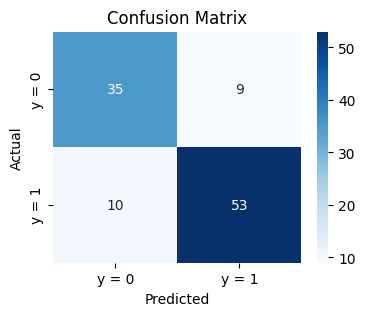

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['y = 0','y = 1'], yticklabels=['y = 0','y = 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

In [ ]:
# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

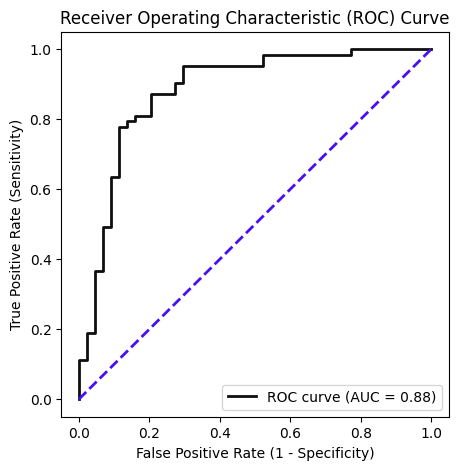

In [ ]:
# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color=palette[0], lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc_score))
plt.plot([0, 1], [0, 1], color=palette[1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.78
Precision: 0.84
Recall: 0.76
F1 Score: 0.8

Confusion Matrix:
 [[35  9]
 [15 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74        44
           1       0.84      0.76      0.80        63

    accuracy                           0.78       107
   macro avg       0.77      0.78      0.77       107
weighted avg       0.78      0.78      0.78       107



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.82
Precision: 0.87
Recall: 0.83
F1 Score: 0.85

Confusion Matrix:
 [[36  8]
 [11 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.87      0.83      0.85        63

    accuracy                           0.82       107
   macro avg       0.82      0.82      0.82       107
weighted avg       0.83      0.82      0.82       107



### AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Create and train the AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.75
Precision: 0.85
Recall: 0.7
F1 Score: 0.77

Confusion Matrix:
 [[36  8]
 [19 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73        44
           1       0.85      0.70      0.77        63

    accuracy                           0.75       107
   macro avg       0.75      0.76      0.75       107
weighted avg       0.77      0.75      0.75       107



### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create and train the Naive Bayes model (Gaussian Naive Bayes)
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.83
Precision: 0.89
Recall: 0.81
F1 Score: 0.85

Confusion Matrix:
 [[38  6]
 [12 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        44
           1       0.89      0.81      0.85        63

    accuracy                           0.83       107
   macro avg       0.83      0.84      0.83       107
weighted avg       0.84      0.83      0.83       107



### Gradient Boosting Models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.8
Precision: 0.85
Recall: 0.81
F1 Score: 0.83

Confusion Matrix:
 [[35  9]
 [12 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        44
           1       0.85      0.81      0.83        63

    accuracy                           0.80       107
   macro avg       0.80      0.80      0.80       107
weighted avg       0.81      0.80      0.80       107



### Support Vector Machine Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create and train the SVM model
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.83
Precision: 0.88
Recall: 0.83
F1 Score: 0.85

Confusion Matrix:
 [[37  7]
 [11 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.88      0.83      0.85        63

    accuracy                           0.83       107
   macro avg       0.83      0.83      0.83       107
weighted avg       0.84      0.83      0.83       107



### K-Neighbors Classifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create and train the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.85
Precision: 0.9
Recall: 0.84
F1 Score: 0.87

Confusion Matrix:
 [[38  6]
 [10 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        44
           1       0.90      0.84      0.87        63

    accuracy                           0.85       107
   macro avg       0.84      0.85      0.85       107
weighted avg       0.85      0.85      0.85       107



### XGBClassifier

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create XGBClassifier instance and fit the model
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.8
Precision: 0.84
Recall: 0.83
F1 Score: 0.83

Confusion Matrix:
 [[34 10]
 [11 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76        44
           1       0.84      0.83      0.83        63

    accuracy                           0.80       107
   macro avg       0.80      0.80      0.80       107
weighted avg       0.80      0.80      0.80       107



### Neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train_scaled.shape

(196, 13)

In [ ]:
X_test_scaled.shape

(107, 13)

In [ ]:
# Build a simple neural network model
model = Sequential()
model.add(Dense(units=7, input_dim=13, activation='relu'))   # (inputLayerUnits +1) / 2
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_data=(X_test_scaled, y_test))

Epoch 1/100
2/2 [==============================] - 1s 241ms/step - loss: 1.0603 - accuracy: 0.4031 - val_loss: 1.0151 - val_accuracy: 0.3645
Epoch 2/100
2/2 [==============================] - 0s 41ms/step - loss: 1.0484 - accuracy: 0.4082 - val_loss: 1.0041 - val_accuracy: 0.3645
Epoch 3/100
2/2 [==============================] - 0s 46ms/step - loss: 1.0367 - accuracy: 0.4082 - val_loss: 0.9932 - val_accuracy: 0.3925
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 1.0257 - accuracy: 0.4082 - val_loss: 0.9824 - val_accuracy: 0.3925
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 1.0142 - accuracy: 0.4082 - val_loss: 0.9718 - val_accuracy: 0.3925
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 1.0038 - accuracy: 0.4082 - val_loss: 0.9613 - val_accuracy: 0.3925
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.9930 - accuracy: 0.4082 - val_loss: 0.9510 - val_accuracy: 0.3925
Epoch 8/100
2/2 [==

In [ ]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.round(y_pred_proba).flatten()

4/4 [==============================] - 0s 3ms/step


##### Evaluation metrics

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.74
Precision: 0.82
Recall: 0.71
F1 Score: 0.76

Confusion Matrix:
 [[34 10]
 [18 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71        44
           1       0.82      0.71      0.76        63

    accuracy                           0.74       107
   macro avg       0.74      0.74      0.74       107
weighted avg       0.75      0.74      0.74       107



In [ ]:
# Access the training history
print("Training History:")
print(history.history)

Training History:
{'loss': [1.0603127479553223, 1.0484139919281006, 1.0367188453674316, 1.0257296562194824, 1.0141923427581787, 1.0037922859191895, 0.9929929375648499, 0.9824615716934204, 0.9719434976577759, 0.9617424607276917, 0.9519035220146179, 0.942004919052124, 0.9323715567588806, 0.9232872724533081, 0.9140426516532898, 0.9050965309143066, 0.8966412544250488, 0.8883232474327087, 0.8801225423812866, 0.8721176385879517, 0.864311695098877, 0.8565245866775513, 0.8492396473884583, 0.8420422077178955, 0.8347422480583191, 0.827716588973999, 0.8215161561965942, 0.8148094415664673, 0.8082648515701294, 0.8022371530532837, 0.7962222695350647, 0.7900134325027466, 0.784336507320404, 0.7786887288093567, 0.7729910016059875, 0.7674365639686584, 0.7623872756958008, 0.7569990158081055, 0.7519098520278931, 0.7469648122787476, 0.7418213486671448, 0.737067461013794, 0.7322708368301392, 0.7274602651596069, 0.7229227423667908, 0.7182769775390625, 0.7138224840164185, 0.7092729806900024, 0.705095589160919

In [ ]:
num_epochs = len(history.history['accuracy'])

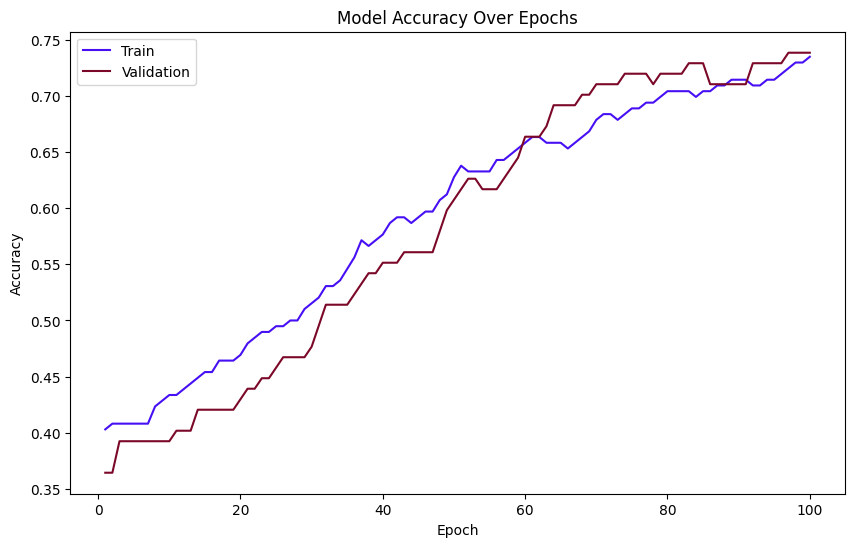

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, num_epochs + 1), y=history.history['accuracy'], label='Train', color=palette[1])
sns.lineplot(x=range(1, num_epochs + 1), y=history.history['val_accuracy'], label='Validation', color=palette[2])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

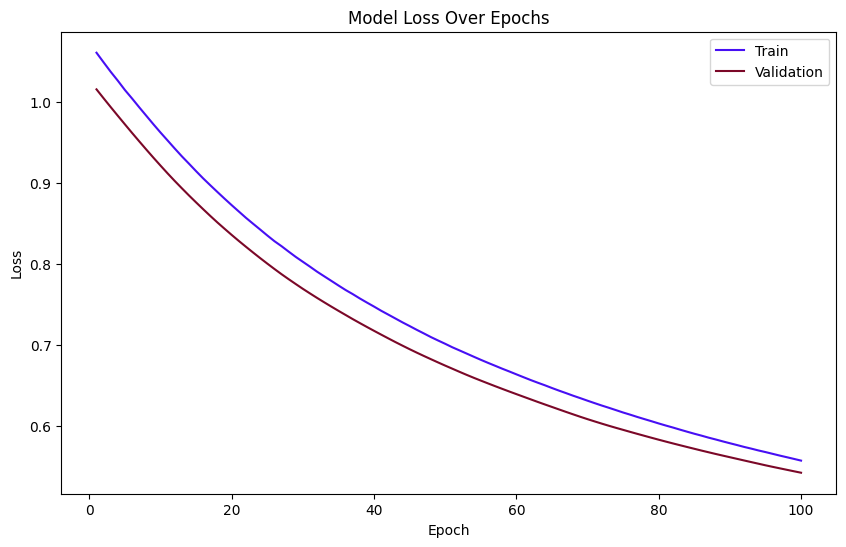

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, num_epochs + 1),y=history.history['loss'], label='Train', color=palette[1])
sns.lineplot(x=range(1, num_epochs + 1), y=history.history['val_loss'], label='Validation', color=palette[2])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()